### Abstract

Inflation has been a major source of discussion and stress within the United States since the outset of the pandemic and one area where this has been most pronounced is within grocery stores. American consumers have reported anecdotally about the substantial price increases that have been passed along to them and the review was designed to assess the results with objective data. Using a USDA publicly available source that tracks grocery sales over time, an analysis was conducted to confirm the trends that have occurred in different food categories as well as run an analysis of variance on the different groupings at a state and regional level. While the data spanned from 2019 through 2022, there were many states with missing information and there are a number of potential reasons as to why collection was impacted during this time frame. Additionally, the project attempted to utilize the data available to build a predictive model to classify regional activity using K-Nearest Neighbors based on the historical grocery information. Overall, these methods were able to confirm the increase in dollar and unit sales that occurred as well as show statistical differences across the nation.

### Research Questions

* Are grocery store sales data useful in predicting the region in the United States?
* Do sales across different groups (i.e. states, regions,sub-regions), have statistically significant differences?
* How have food category sales changed over time?


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy import stats

#### Loading Data

In [2]:
github_loc = 'https://raw.githubusercontent.com/jforster19/Data602/main/StateAndCategory.xlsx'
sales = pd.read_excel(github_loc,engine='openpyxl',skiprows=1)

#### Reviewing Summary Statistics and Exploratory Analysis

In [3]:
sales.shape

(79468, 18)

In [4]:
sales.dtypes
#reviewing the data types

Date                               object
State                              object
Category                           object
Dollars                           float64
Unit sales                        float64
Volume sales                      float64
Dollars last year                 float64
Unit sales last year              float64
Volume sales last year            float64
Dollars 3 years ago               float64
Unit sales 3 years ago            float64
Volume sales 3 years ago          float64
Percent change dollars 1 year     float64
Percent change units 1 year       float64
Percent change volume 1 year      float64
Percent change dollars 3 years    float64
Percent change units 3 years      float64
Percent change volume 3 years     float64
dtype: object

In [5]:
sales.describe()
# reviewing the standard summary statistics

,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,Unit sales 3 years ago,Volume sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years
count,7.946400e+04,7.945800e+04,7.224000e+04,7.918700e+04,7.917900e+04,7.198800e+04,2.999600e+04,2.999500e+04,2.726900e+04,79187.000000,79179.000000,71988.000000,29996.000000,29989.000000,27269.00000
mean,3.004220e+07,9.285564e+06,4.346782e+07,2.806284e+07,9.271008e+06,4.261446e+07,2.596150e+07,9.021098e+06,4.024885e+07,7.903934,1.331560,1.585343,23.209221,2.338121,2.87631
std,4.770448e+07,1.510421e+07,1.315261e+08,4.438617e+07,1.509662e+07,1.283242e+08,4.122033e+07,1.480536e+07,1.203044e+08,14.906693,14.578056,16.102667,14.995531,14.386263,16.62808
min,4.941600e+04,4.437000e+03,9.650000e+02,5.002700e+04,4.437000e+03,9.990000e+02,5.002700e+04,4.585000e+03,1.004000e+03,-63.600000,-67.400000,-64.600000,-43.300000,-48.800000,-46.40000
25%,4.396122e+06,1.110472e+06,1.676684e+06,4.121482e+06,1.099937e+06,1.682662e+06,3.813584e+06,1.057744e+06,1.629940e+06,1.000000,-4.700000,-5.700000,15.700000,-3.900000,-4.80000
50%,1.348743e+07,4.212998e+06,6.514509e+06,1.265726e+07,4.191513e+06,6.490956e+06,1.176354e+07,4.070996e+06,6.272329e+06,7.100000,-0.600000,-0.400000,22.600000,1.100000,1.10000
75%,3.537329e+07,1.068737e+07,2.410544e+07,3.320676e+07,1.061359e+07,2.404990e+07,3.062670e+07,1.021851e+07,2.322585e+07,13.300000,5.400000,6.900000,29.825000,6.700000,8.30000
max,6.452044e+08,2.225147e+08,1.730773e+09,6.450795e+08,2.224711e+08,1.730773e+09,4.429971e+08,1.571063e+08,1.569918e+09,880.600000,931.400000,1250.000000,823.600000,828.600000,1081.30000


#### States with Highest Sales

In [6]:
sales.groupby(['State'])['Dollars'].sum().sort_values(ascending=False)

State
California        2.435223e+11
Texas             2.102364e+11
Florida           1.977243e+11
New York          1.220768e+11
Pennsylvania      9.408928e+10
Ohio              9.223253e+10
North Carolina    9.078554e+10
Georgia           8.746254e+10
Illinois          8.558968e+10
Michigan          7.594329e+10
Virginia          7.565475e+10
Arizona           5.883343e+10
Washington        5.740986e+10
Tennessee         5.739552e+10
Massachusetts     5.301833e+10
Indiana           5.139336e+10
Missouri          5.019765e+10
Colorado          4.700719e+10
South Carolina    4.638427e+10
Maryland          4.408488e+10
Alabama           4.332366e+10
Louisiana         4.086919e+10
Minnesota         4.034994e+10
Wisconsin         4.027824e+10
Kentucky          3.646565e+10
Oregon            3.289977e+10
Oklahoma          3.160813e+10
Iowa              2.952568e+10
Connecticut       2.732285e+10
Nevada            2.488538e+10
Mississippi       2.444928e+10
Arkansas          2.430016e+10
Ka

In [7]:
sales.tail()
# identifying extra rows in input

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,Unit sales 3 years ago,Volume sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years
79463,2022-12-18,Wyoming,Vegetables,2348132.0,1035860.0,1692035.0,2162981.0,1055737.0,1697209.0,2323511.0,1179534.0,1959064.0,8.6,-1.9,-0.3,1.1,-12.2,-13.6
79464,NA = data are not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79465,Note: The series is subject to revision based ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79466,"Source: USDA, Economic Research Service calcul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79467,"Data as of December 18, 2022.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Wrangling/Cleanup

In [12]:
sales['yr'] = sales['Date'].apply(lambda x: x[:4])
sub_sales = sales[~pd.isna(sales['State'])]
pd.pivot_table(sub_sales, index=['State'], values='Dollars',columns=['yr'], aggfunc=sum, fill_value=0)
# looking at state sales over time period

yr,2019,2020,2021,2022
State,,,,
Alabama,2907803553,12707572767,13414568429,14293719695
Arizona,4022043777,17457647592,18136234008,19217504447
Arkansas,1648705185,7249830463,7449979657,7951641019
California,16763977069,74552478468,74269475769,77936388879
Colorado,3231689270,14049135357,14354663299,15371697597
Connecticut,1930576704,8357709900,8320598744,8713968129
Florida,13212876547,57940342839,60854733571,65716356873
Georgia,5839158282,25749011531,26888478567,28985891783
Illinois,5923607433,25746623987,26249893295,27669556822


In [89]:
# Create formatted date value
sub_sales.loc[:,'Format_Date'] = pd.to_datetime(sub_sales['Date'],format='%Y-%m-%d')

/var/folders/d5/98xjjxvs53s2lf63ml40f_sc0000gn/T/ipykernel_2687/3268233242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sales.loc[:,'Format_Date'] = pd.to_datetime(sub_sales['Date'],format='%Y-%m-%d')


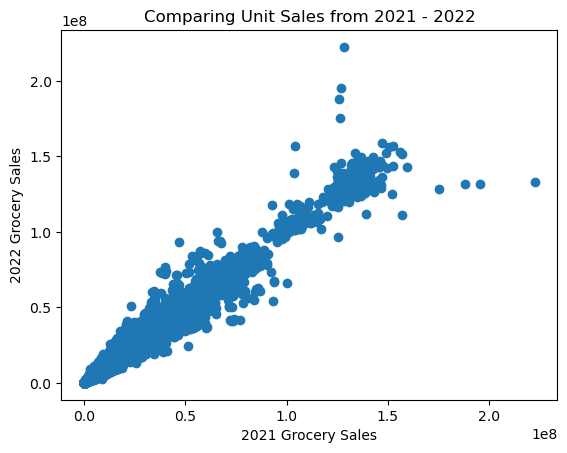

In [13]:
plt.scatter("Unit sales last year","Unit sales",data=sub_sales)
plt.title('Comparing Unit Sales from 2021 - 2022')
plt.xlabel('2021 Grocery Sales')
plt.ylabel('2022 Grocery Sales')
plt.show();

#### Enhancing Scatterplot Review: Adding regional detail

In [14]:
#source: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
region = {}
sub_region = {}
region['Northeast']= ['New England','Middle Atlantic']
region['Midwest']= ['East North Central','West North Central']
region['South']=['South Atlantic','East South Central','West South Central']
region['West']=['Mountain','Pacific']
sub_region['New England'] = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont']
sub_region['Middle Atlantic']=['New Jersey', 'New York', 'Pennsylvania']
sub_region['South Atlantic']=['Delaware', 'Maryland','District of Columbia', 'Florida','Georgia', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia']
sub_region['East South Central']=['Alabama' ,'Kentucky', 'Mississippi', 'Tennessee'] 
sub_region['West South Central']=['Arkansas','Oklahoma', 'Texas','Louisiana' ]                               
sub_region['West North Central']=['Iowa', 'Kansas',  'Minnesota','Missouri', 'Nebraska','North Dakota', 'South Dakota']
sub_region['East North Central']=['Illinois', 'Indiana' , 'Michigan', 'Ohio', 'Wisconsin']
sub_region['Mountain'] = ['Arizona', 'New Mexico','Colorado','Idaho', 'Montana', 'Nevada', 'Utah', 'Wyoming']
sub_region['Pacific']=['Alaska', 'California', 'Hawaii', 'Oregon' , 'Washington']

In [15]:
def pop_subregion_detail(input_value):
    '''
    This function takes a state value and returns the US Census assigned division
    '''
    key = [k for k,v in sub_region.items() if input_value.strip().title() in v]
    if len(key)>0:
 
        return(key[0])
def pop_region_detail(input_value):
    '''
    This function takes a division of the United States and returns a region as specified by the US government
    '''
    key = [k for k,v in region.items() if input_value.strip().title() in v]
    if len(key)>0:
        return(key[0])


In [16]:
sub_sales.tail()

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,Unit sales 3 years ago,Volume sales 3 years ago,Percent change dollars 1 year,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years,yr
79459,2022-11-20,Wyoming,Vegetables,2602811.0,1173843.0,1913963.0,2397439.0,1180841.0,1937009.0,2257197.0,1207337.0,2049575.0,8.6,-0.6,-1.2,15.3,-2.8,-6.6,2022
79460,2022-11-27,Wyoming,Vegetables,2479794.0,1103847.0,1738002.0,2225316.0,1090546.0,1725419.0,2219431.0,1188227.0,1997316.0,11.4,1.2,0.7,11.7,-7.1,-13.0,2022
79461,2022-12-04,Wyoming,Vegetables,2100624.0,936969.0,1432632.0,1978026.0,969229.0,1498999.0,1811746.0,965439.0,1614865.0,6.2,-3.3,-4.4,15.9,-2.9,-11.3,2022
79462,2022-12-11,Wyoming,Vegetables,2251063.0,999933.0,1542023.0,2083215.0,1031045.0,1627223.0,1861573.0,988900.0,1619299.0,8.1,-3.0,-5.2,20.9,1.1,-4.8,2022
79463,2022-12-18,Wyoming,Vegetables,2348132.0,1035860.0,1692035.0,2162981.0,1055737.0,1697209.0,2323511.0,1179534.0,1959064.0,8.6,-1.9,-0.3,1.1,-12.2,-13.6,2022


In [17]:
sub_sales.loc[:,'subregion'] = sub_sales['State'].apply(pop_subregion_detail)
sub_sales.loc[:,'region']= sub_sales['subregion'].apply(pop_region_detail)

/var/folders/d5/98xjjxvs53s2lf63ml40f_sc0000gn/T/ipykernel_2687/3452856505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sales.loc[:,'subregion'] = sub_sales['State'].apply(pop_subregion_detail)
/var/folders/d5/98xjjxvs53s2lf63ml40f_sc0000gn/T/ipykernel_2687/3452856505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sales.loc[:,'region']= sub_sales['subregion'].apply(pop_region_detail)


In [18]:
#Confirming function worked as expected
sub_sales.groupby('subregion')['Volume sales'].count()

subregion
East North Central     8400
East South Central     6720
Middle Atlantic        3360
Mountain              10080
New England           10080
Pacific                5040
South Atlantic        11760
West North Central    10080
West South Central     6720
Name: Volume sales, dtype: int64

In [19]:
#Confirming function worked as expected
sub_sales.groupby('region')['Volume sales'].count()

region
Midwest      18480
Northeast    13440
South        25200
West         15120
Name: Volume sales, dtype: int64

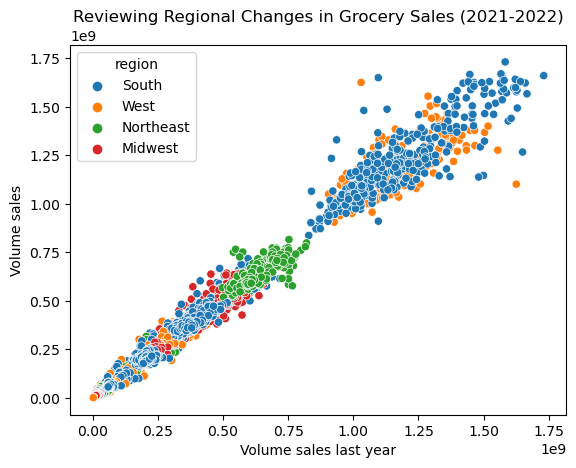

In [20]:
sns.scatterplot(x="Volume sales last year",y="Volume sales",data=sub_sales,hue = 'region').set(title='Reviewing Regional Changes in Grocery Sales (2021-2022)')
plt.show();

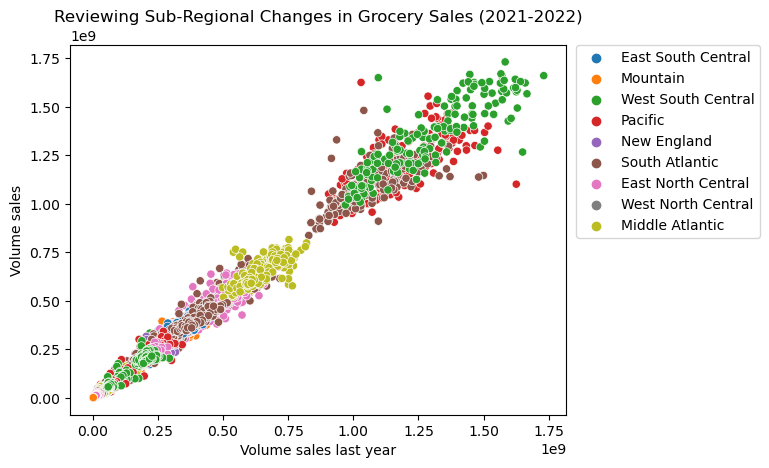

In [21]:
sns.scatterplot(x="Volume sales last year",y="Volume sales",data=sub_sales,hue = 'subregion').set(title='Reviewing Sub-Regional Changes in Grocery Sales (2021-2022)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show();

In [22]:
sub_sales.groupby(['Category'])['Volume sales'].count()

Category
Alcohol                        7224
Beverages                      7224
Commercially prepared items       0
Dairy                          7224
Fats and oils                  7224
Fruits                         7224
Grains                         7224
Meats, eggs, and nuts          7224
Other                          7224
Sugar and sweeteners           7224
Vegetables                     7224
Name: Volume sales, dtype: int64

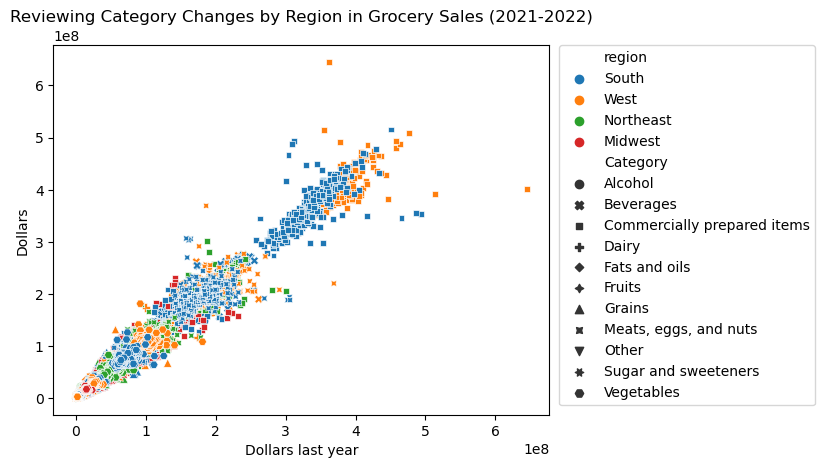

In [23]:
sns.scatterplot(x="Dollars last year",y="Dollars",data=sub_sales,style = 'Category',hue='region',x_jitter=True).set(title='Reviewing Category Changes by Region in Grocery Sales (2021-2022)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show();

### Imputation for Missing Values

In [24]:
sub_sales.isnull().sum()

Date                                  0
State                                 0
Category                              0
Dollars                               0
Unit sales                            6
Volume sales                       7224
Dollars last year                   277
Unit sales last year                285
Volume sales last year             7476
Dollars 3 years ago               49468
Unit sales 3 years ago            49469
Volume sales 3 years ago          52195
Percent change dollars 1 year       277
Percent change units 1 year         285
Percent change volume 1 year       7476
Percent change dollars 3 years    49468
Percent change units 3 years      49475
Percent change volume 3 years     52195
yr                                    0
subregion                             0
region                                0
dtype: int64

Given the high number of na values for 3 year old data those columns will be excluded from the imputation process for efficiency perspective

In [25]:
features = sub_sales[['Dollars', 'Unit sales', 'Volume sales',
       'Dollars last year', 'Unit sales last year', 'Volume sales last year']]

### KNN Nearest Neighbors: Classifying regions

#### Data preparation

In [26]:
region_dict = {}
region_dict['South'] = 1
region_dict['West'] = 2
region_dict['Northeast'] = 3
region_dict['Midwest'] = 4
sub_sales['target'] = sub_sales['region'].apply(lambda x: region_dict[x])
target = sub_sales['target'].values

/var/folders/d5/98xjjxvs53s2lf63ml40f_sc0000gn/T/ipykernel_2687/85130654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_sales['target'] = sub_sales['region'].apply(lambda x: region_dict[x])


In [31]:
pipe_steps = [('imputer',SimpleImputer()),('scaler', StandardScaler()),('knn', KNN())]
params = {'knn__n_neighbors':np.arange(5,20)}
ml_pipeline = Pipeline(pipe_steps)
X_train,X_test,y_train,y_test = tts(features,target,test_size=0.2,random_state=49)
cv = GridSearchCV(ml_pipeline,param_grid=params)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

In [124]:
cv.best_params_

{'knn__n_neighbors': 5}

In [32]:
print(f'The accuracy of the model was: {metrics.accuracy_score(y_test,y_pred):.2%}')

The accuracy of the model was: 79.39%


In [33]:
#additional metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.80      0.85      0.82      5560
           2       0.78      0.77      0.77      3317
           3       0.84      0.82      0.83      2945
           4       0.77      0.72      0.74      4071

    accuracy                           0.79     15893
   macro avg       0.80      0.79      0.79     15893
weighted avg       0.79      0.79      0.79     15893



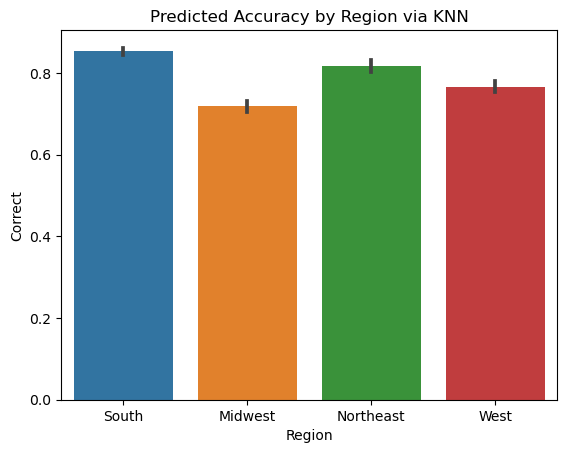

In [34]:
results = pd.DataFrame(zip(y_test,y_pred),columns=['Label','Predicted'])
results['Region'] = results['Label'].apply(lambda x: 'South' if x==1 else 'West' if x==2 else 'Northeast' if x==3 else "Midwest")
results['Correct'] = results.apply(lambda x: x['Label']==x['Predicted'],axis=1)
sns.barplot(x='Region',y='Correct',data=results).set(title='Predicted Accuracy by Region via KNN')
plt.show();

### ANOVA State: Assessing State dollar sales are different

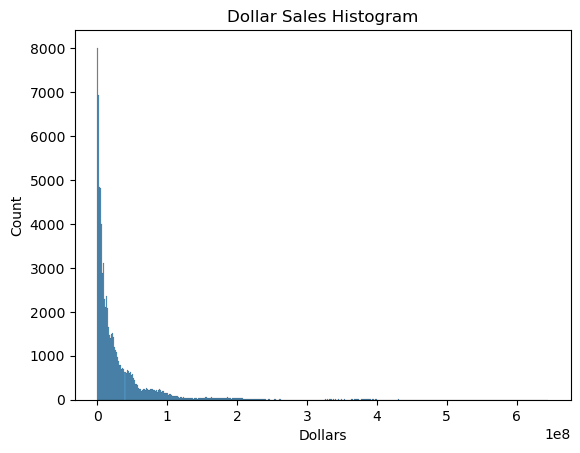

In [128]:
sns.histplot(sub_sales['Dollars']).set(title='Dollar Sales Histogram')
plt.show();

In [41]:
box_trans,_ = stats.boxcox(sub_sales['Dollars'])

In [51]:
group_comparison = pd.concat([sub_sales,pd.Series(box_trans,name='Dollars Box-Cox')],axis=1)
group_comparison.head()

,Date,State,Category,Dollars,Unit sales,Volume sales,Dollars last year,Unit sales last year,Volume sales last year,Dollars 3 years ago,...,Percent change units 1 year,Percent change volume 1 year,Percent change dollars 3 years,Percent change units 3 years,Percent change volume 3 years,yr,subregion,region,target,Dollars Box-Cox
0,2019-10-06,Alabama,Alcohol,23611285.0,2974221.0,837930.0,22449300.0,2979065.0,815637.0,NaN,...,-0.2,2.7,NaN,NaN,NaN,2019,East South Central,South,1,41.487553
1,2019-10-13,Alabama,Alcohol,23220758.0,2895573.0,830131.0,23314625.0,2978312.0,855363.0,NaN,...,-2.8,-2.9,NaN,NaN,NaN,2019,East South Central,South,1,41.406439
2,2019-10-20,Alabama,Alcohol,21770283.0,2730939.0,762832.0,21070374.0,2745973.0,766339.0,NaN,...,-0.5,-0.5,NaN,NaN,NaN,2019,East South Central,South,1,41.093925
3,2019-10-27,Alabama,Alcohol,21956558.0,2764970.0,768366.0,20188919.0,2651957.0,713812.0,NaN,...,4.3,7.6,NaN,NaN,NaN,2019,East South Central,South,1,41.135098
4,2019-11-03,Alabama,Alcohol,23183482.0,2872683.0,815352.0,22565261.0,2884813.0,801717.0,NaN,...,-0.4,1.7,NaN,NaN,NaN,2019,East South Central,South,1,41.398632


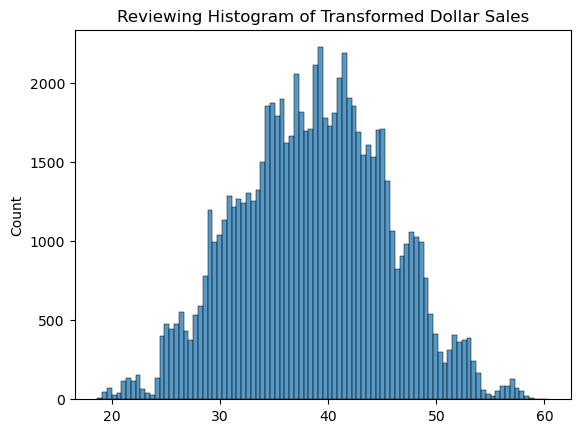

In [54]:
sns.histplot(box_trans).set(title='Reviewing Histogram of Transformed Dollar Sales')
plt.show();

In [56]:
group_comparison.groupby('State')['Dollars Box-Cox'].agg(['mean','std']).sort_values(['std'],ascending=False)

,mean,std
State,,
California,47.943322,6.442919
Texas,47.010362,6.259732
Florida,46.837362,6.149347
Ohio,42.655151,5.973431
Pennsylvania,42.574334,5.969662
Michigan,41.796652,5.773434
Illinois,42.407683,5.745821
Washington,40.466217,5.728689
Virginia,41.830326,5.698350


#### Reviewing Assumptions of Anova
* 1) Using the box-cox tranformation allowed for the data to be modified to more closely approximate the normal distribution to satisfy this assumption
* 2) From a quick visual glance at the standard deviations it does not appear that there are sizable differences between the states' values. A general guide for assessing equal variance is to review the ratio of the greatest and smallest standard deviations to see that it is between 0.5 through 2. In this case the ratio (6.442919/4.510352) ~ 1.42 should be sufficient to satisfy this requirement.
* 3) The data itself was collected and aggregated by the USDA from a nationally representative sample which does not appear to violate the independence assumption.

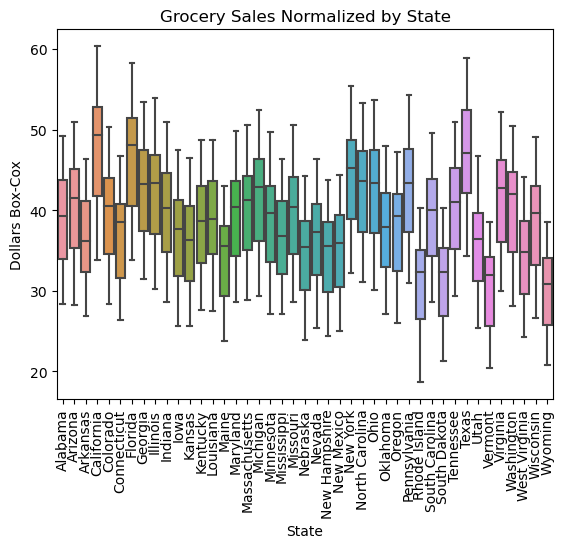

In [61]:
ax = sns.boxplot(x='State',y='Dollars Box-Cox',data=group_comparison)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(title='Grocery Sales Normalized by State')
plt.show();

#### Hypothesis Test:
$$H_{0}: \bar{x_1} =  \bar{x_2} = \bar{x_3} = \bar{x_k}$$

Ha: At least one of the group means is different

Credit to this [link](https://stackoverflow.com/questions/61058846/code-to-do-anova-on-different-dataframes-where-groups-can-change) for guidance to compare many groups at scale

In [73]:
state_grp_values = [r['Dollars Box-Cox'] for _,r in group_comparison.groupby('State')]
f_stat, p_val = stats.f_oneway(*state_grp_values)

In [76]:
print(f'When evaluating the f-statistic {f_stat} and p-value {p_val} \
after running this statistical test it is clear that the null hypothesis is rejected and there are group means that are different.')

When evaluating the f-statistic 1094.5941178746273 and p-value 0.0 after running this statistical test it is clear that the null hypothesis is rejected and there are group means that are different.


In [78]:
group_comparison.columns

Index(['Date', 'State', 'Category', 'Dollars', 'Unit sales', 'Volume sales',
       'Dollars last year', 'Unit sales last year', 'Volume sales last year',
       'Dollars 3 years ago', 'Unit sales 3 years ago',
       'Volume sales 3 years ago', 'Percent change dollars 1 year',
       'Percent change units 1 year', 'Percent change volume 1 year',
       'Percent change dollars 3 years', 'Percent change units 3 years',
       'Percent change volume 3 years', 'yr', 'subregion', 'region', 'target',
       'Dollars Box-Cox', 'rownum'],
      dtype='object')

In [ ]:
group_comparison.groupby('region')['Dollars Box-Cox'].agg(['mean','std']).sort_values(['std'],ascending=False)

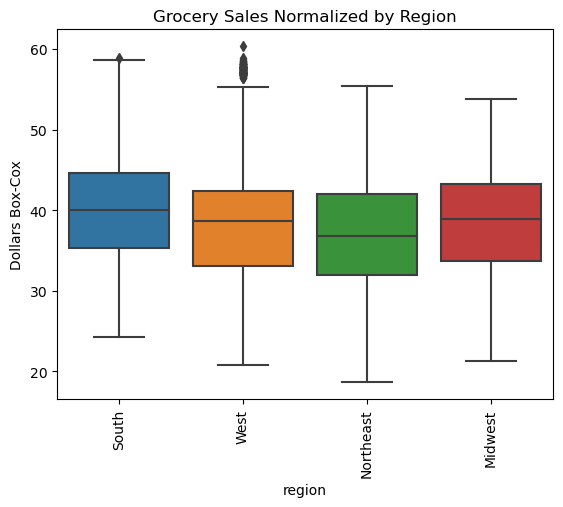

In [82]:
ax = sns.boxplot(x='region',y='Dollars Box-Cox',data=group_comparison)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(title='Grocery Sales Normalized by Region')
plt.show();

In [ ]:
group_comparison.groupby('subregion')['Dollars Box-Cox'].agg(['mean','std']).sort_values(['std'],ascending=False)

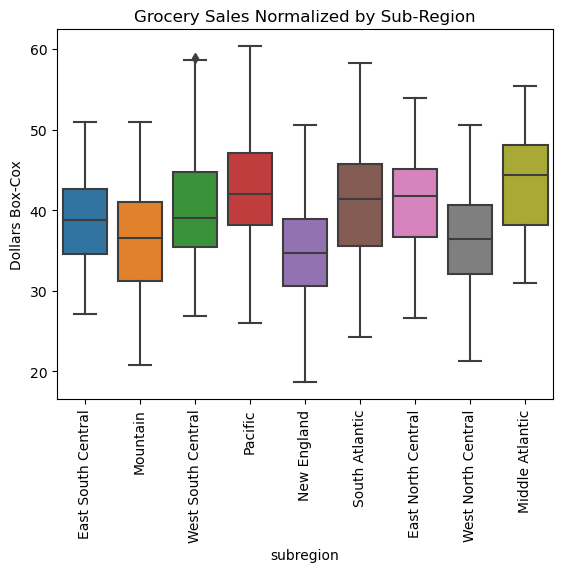

In [83]:
ax = sns.boxplot(x='subregion',y='Dollars Box-Cox',data=group_comparison)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set(title='Grocery Sales Normalized by Sub-Region')
plt.show();

In [79]:
region_grp_values = [r['Dollars Box-Cox'] for _,r in group_comparison.groupby('region')]
f_stat_reg, p_val_reg = stats.f_oneway(*region_grp_values)

subregion_grp_values = [r['Dollars Box-Cox'] for _,r in group_comparison.groupby('subregion')]
f_stat_sub_reg, p_val_sub_reg = stats.f_oneway(*subregion_grp_values)

In [87]:
print(f'Region F-Statistic: {f_stat_reg} and P-value: {p_val_reg}')
print(f'Sub-Region F-Statistic: {f_stat_sub_reg} and P-value: {p_val_sub_reg}')

Region F-Statistic: 818.0560879099979 and P-value: 0.0
Sub-Region F-Statistic: 1923.3491051765106 and P-value: 0.0


Both tests comparing groups for region and sub-region indicate that there are differences in the means based on p-values of 0.0.

In [90]:
sub_sales.columns

Index(['Date', 'State', 'Category', 'Dollars', 'Unit sales', 'Volume sales',
       'Dollars last year', 'Unit sales last year', 'Volume sales last year',
       'Dollars 3 years ago', 'Unit sales 3 years ago',
       'Volume sales 3 years ago', 'Percent change dollars 1 year',
       'Percent change units 1 year', 'Percent change volume 1 year',
       'Percent change dollars 3 years', 'Percent change units 3 years',
       'Percent change volume 3 years', 'yr', 'subregion', 'region', 'target',
       'Format_Date'],
      dtype='object')

/var/folders/d5/98xjjxvs53s2lf63ml40f_sc0000gn/T/ipykernel_2687/906678202.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_line.set_xticklabels(ax_line.get_xticklabels(),rotation=90)


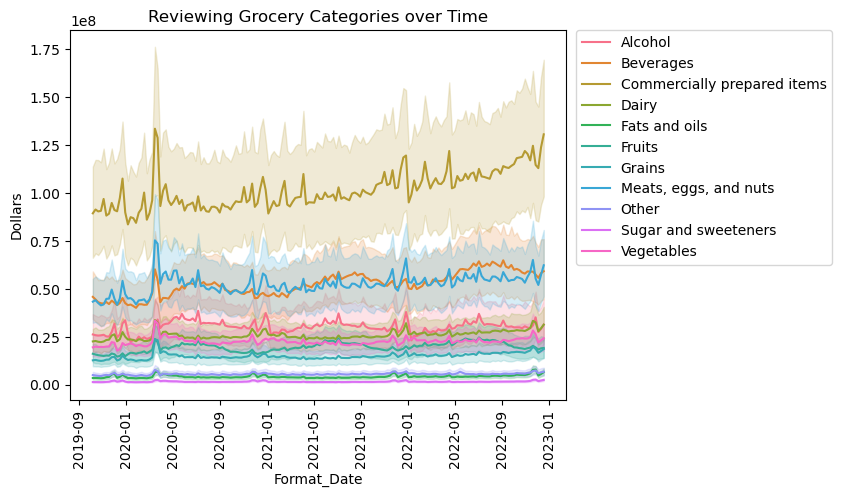

In [96]:
ax_line = sns.lineplot(x='Format_Date',y='Dollars',data=sub_sales,hue='Category')
ax_line.set_xticklabels(ax_line.get_xticklabels(),rotation=90)
ax_line.set(title='Reviewing Grocery Categories over Time')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show();

In [113]:
cat_sales = sub_sales.groupby(['Category','yr'])[['Unit sales','Volume sales',"Dollars"]].sum().reset_index()

In [114]:
cat_sales.iloc[:,2:] = cat_sales.iloc[:,2:].div(1000000)

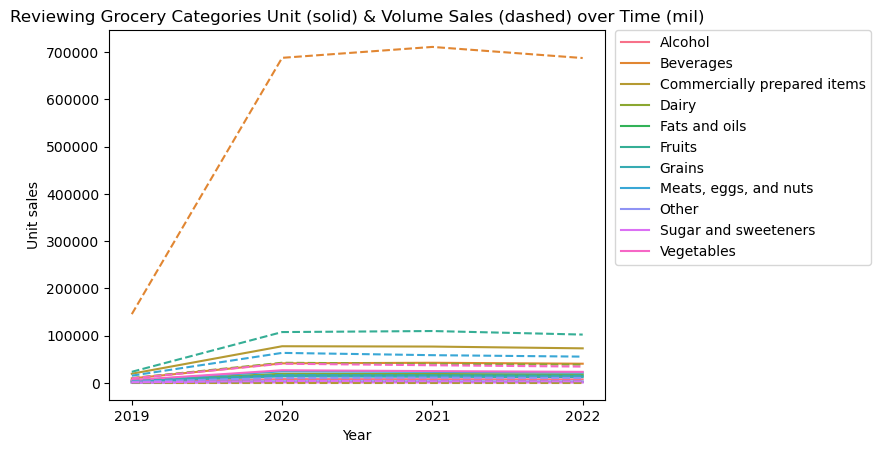

In [122]:
ax_cat = sns.lineplot(x='yr',y='Unit sales',data=cat_sales,hue='Category')
sns.lineplot(x='yr',y='Volume sales',data=cat_sales,linestyle='dashed',hue='Category',legend=False)
ax_cat.set(title='Reviewing Grocery Categories Unit (solid) & Volume Sales (dashed) over Time (mil)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.show();

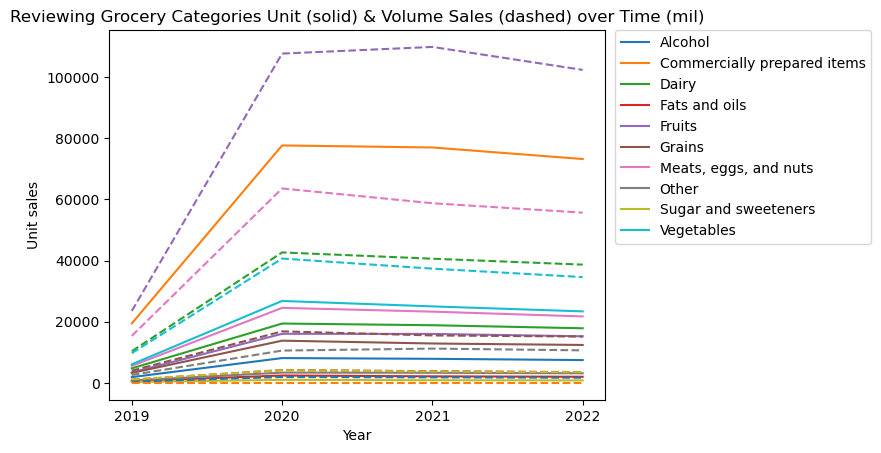

In [121]:
cat_sales_no_bev = cat_sales[cat_sales['Category']!='Beverages']
ax_cat_no_bev = sns.lineplot(x='yr',y='Unit sales',data=cat_sales_no_bev,hue='Category')
sns.lineplot(x='yr',y='Volume sales',data=cat_sales_no_bev,linestyle='dashed',hue='Category',legend=False)
ax_cat_no_bev.set(title='Reviewing Grocery Categories Unit (solid) & Volume Sales (dashed) over Time (mil)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Year')
plt.show();

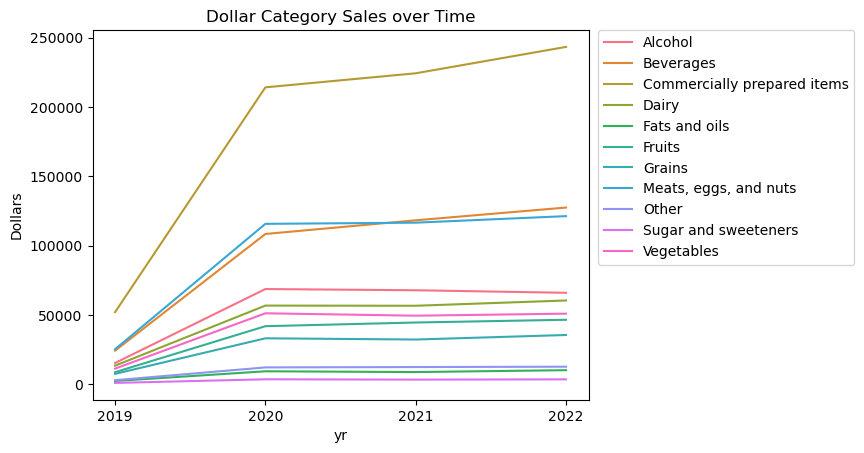

In [120]:
sns.lineplot(x='yr',y='Dollars',data=cat_sales,hue='Category').set(title='Dollar Category Sales over Time')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show();

The major trend appears to be consistent with expectations that since the pandemic began grocery sales have increased, but are doing so at a much smaller pace from 2021 onward. Beverage sales seem much higher than all other categories, but further investigation is probably needed to understand which types of products are grouped together.

In [181]:
mnthly_cat_sales = sub_sales.groupby([pd.Grouper(key='Format_Date',freq="M"),'Category'])['Dollars'].sum().reset_index().sort_values(by=['Category','Format_Date'],ascending=[True,True])
mnthly_cat_sales['Prior Month Dollars'] = mnthly_cat_sales.groupby(['Category'])['Dollars'].shift(-1)
mnthly_cat_sales['Monthly Perc Change'] = mnthly_cat_sales.apply(lambda row: 0 if row['Prior Month Dollars']==0 else (row['Dollars']-row['Prior Month Dollars'])/row['Prior Month Dollars'],axis=1)

In [182]:
mnthly_cat_sales.head(10)

,Format_Date,Category,Dollars,Prior Month Dollars,Monthly Perc Change
0,2019-10-31,Alcohol,4.438657e+09,4.455810e+09,-0.003850
11,2019-11-30,Alcohol,4.455810e+09,6.360584e+09,-0.299465
22,2019-12-31,Alcohol,6.360584e+09,4.086485e+09,0.556493
33,2020-01-31,Alcohol,4.086485e+09,4.184888e+09,-0.023514
44,2020-02-29,Alcohol,4.184888e+09,6.201150e+09,-0.325143
55,2020-03-31,Alcohol,6.201150e+09,5.496884e+09,0.128121
66,2020-04-30,Alcohol,5.496884e+09,7.550577e+09,-0.271992
77,2020-05-31,Alcohol,7.550577e+09,5.807860e+09,0.300062
88,2020-06-30,Alcohol,5.807860e+09,5.779627e+09,0.004885
99,2020-07-31,Alcohol,5.779627e+09,6.841090e+09,-0.155160


/var/folders/d5/98xjjxvs53s2lf63ml40f_sc0000gn/T/ipykernel_2687/2314683647.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  month_line.set_xticklabels(month_line.get_xticklabels(),rotation=90)


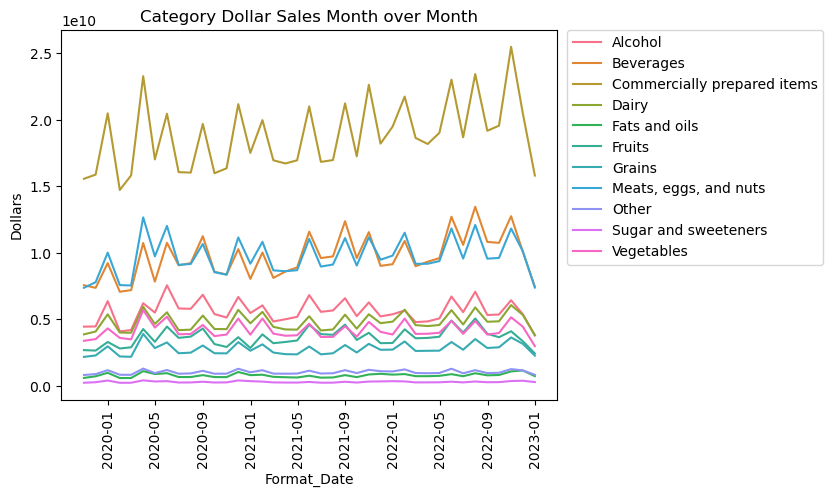

In [187]:
month_line = sns.lineplot(x='Format_Date',y='Dollars',data=mnthly_cat_sales,hue='Category') #.set(title='Dollar Category Sales over Time')
month_line.set_xticklabels(month_line.get_xticklabels(),rotation=90)
month_line.set(title='Category Dollar Sales Month over Month')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show();

/var/folders/d5/98xjjxvs53s2lf63ml40f_sc0000gn/T/ipykernel_2687/482718006.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  month_perc_chg.set_xticklabels(month_perc_chg.get_xticklabels(),rotation=90)


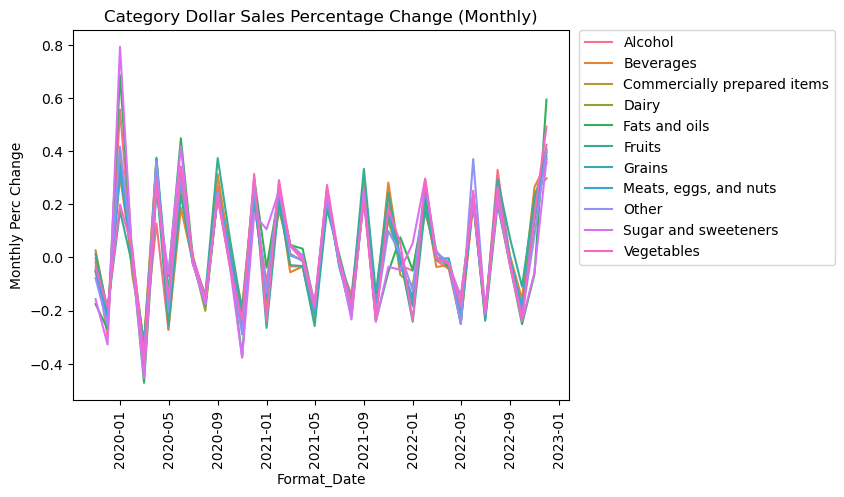

In [190]:
month_perc_chg = sns.lineplot(x='Format_Date',y='Monthly Perc Change',data=mnthly_cat_sales,hue='Category') #.set(title='Dollar Category Sales over Time')
month_perc_chg.set_xticklabels(month_perc_chg.get_xticklabels(),rotation=90)
month_perc_chg.set(title='Category Dollar Sales Percentage Change (Monthly)')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show();

#### Conclusion

The analysis was successful in answering the research questions posed as outlined at the beginning of the review. Consistent with firsthand accounts and commentary, sales did in fact go up over this time frame across nearly every category although the mixture of what exactly contributed to those increases is beyond the scope of the analysis. Despite the impact across the board, different regions and states had different levels of increase and part of that can likely be tied to the dramatic migration trends that occurred over this time as consumer preferences and behaviors changed. The differences were statistically significant, but more work can be done to review differences within regions or sub-regions themselves to potentially identify where states had somewhat alternative experiences. Lastly, the predictive model was able to correctly classify 79% of regions based on the historical grocery store data. Perhaps further work could be done to refine the imputation methods to improve the accuracy and precision.